<a href="https://colab.research.google.com/github/sakshamjn/Omdena-OVAC/blob/main/news_paper_analytics_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# natural language processing: n-gram ranking
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
# add appropriate words that will be ignored in the analysis
ADDITIONAL_STOPWORDS = ['covfefe']
nltk.download('stopwords')
nltk.download('wordnet')
import matplotlib.pyplot as plt 
def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Importing CSV using Pandas


In [ ]:
import pandas as pd
df= pd.read_csv('/content/Reviewed_File_all_english.csv', encoding = "cp437")
df.head()

,Unnamed: 0,OVAC,PVAC,Country,Date,Title,Article_Link,Article,Summary,Keywords,Language,Tag
0,0,0.0,1,Finland,9.1.2020,Appeal court upholds guilty verdict in Oulu ch...,https://yle.fi/uutiset/11150396,The Rovaniemi Court of Appeal has upheld the c...,NaN,NaN,English,PVAC
1,1,0.0,1,Finland,15.5.2019,Mikkeli man convicted in child sexual abuse case,https://yle.fi/uutiset/10783816,The defendant in the case was convicted and se...,NaN,NaN,English,PVAC
2,2,1.0,1,Finland,7.6.2019,Court hands down 40-month prison sentence in 4...,https://yle.fi/uutiset/10820884,The Oulu district court has convicted a 29-yea...,NaN,NaN,English,mixed
3,3,0.0,1,Finland,3.1.2019,Southern Finland coach in custody on suspicion...,https://yle.fi/uutiset/10579990,"The coach of a sports club in HyvinkΣΣ, southe...",NaN,NaN,English,PVAC
4,4,1.0,0,Finland,20.9.2019,Ex-church councillor among four charged in vio...,https://yle.fi/uutiset/10981177,"Authorities in Ostrobothnia, western Finland h...",NaN,NaN,English,OVAC


Histogram to mark number of words in each sentences


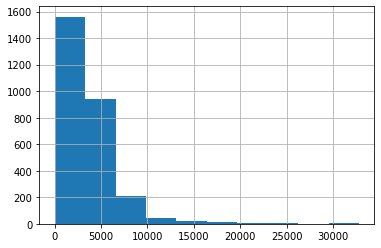

In [ ]:
df['Article'].str.len().hist()#change thc column name 

Importing Libraries


In [ ]:
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords')

stop= set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df.dropna(subset = ["Article"], inplace=True)#change thc column name 

BASIC PREPROCESSING OF TEXT
(Note remember to change the column name when working with your own dataset)


In [ ]:
import nltk
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize 
nltk.download('punkt')
nltk.download('wordnet')
def preprocess_papers(df):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for df in df['Article']:#change thc column name 
        words=[w for w in word_tokenize(df) if (w not in stop)]
        
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus
corpus=preprocess_papers(df)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Preparing Corpus


In [ ]:
import gensim
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

LDA TOPIC MODELLING Along with distribution of Keyword related to each Topic

In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 6, 
                                   id2word = dic,                                    
                                   passes = 20,
                                   workers = 5)
lda_model.show_topics()
print(Echo_print("HEllo World"))


[(0,
  '0.008*"said" + 0.007*"The" + 0.004*"child" + 0.004*"one" + 0.003*"case" + 0.003*"people" + 0.003*"would" + 0.002*"also" + 0.002*"sexual" + 0.002*"year"'),
 (1,
  '0.008*"The" + 0.006*"said" + 0.004*"also" + 0.003*"say" + 0.003*"would" + 0.003*"time" + 0.003*"school" + 0.003*"people" + 0.003*"one" + 0.003*"year"'),
 (2,
  '0.011*"said" + 0.010*"The" + 0.006*"sexual" + 0.006*"abuse" + 0.005*"year" + 0.004*"would" + 0.004*"child" + 0.004*"woman" + 0.004*"school" + 0.004*"one"'),
 (3,
  '0.029*"child" + 0.011*"The" + 0.011*"said" + 0.008*"online" + 0.008*"sexual" + 0.007*"abuse" + 0.005*"also" + 0.005*"case" + 0.005*"parent" + 0.004*"law"'),
 (4,
  '0.017*"said" + 0.016*"child" + 0.011*"The" + 0.006*"year" + 0.006*"abuse" + 0.004*"girl" + 0.004*"victim" + 0.004*"also" + 0.004*"sex" + 0.004*"police"'),
 (5,
  '0.016*"The" + 0.016*"said" + 0.012*"child" + 0.010*"girl" + 0.009*"sexual" + 0.008*"year" + 0.008*"police" + 0.007*"abuse" + 0.006*"victim" + 0.006*"court"')]

Installing and Running Topic Modelling Simulation

In [ ]:
!pip install pyldavis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
vis

     |████████████████████████████████| 1.6MB 2.9MB/s 
  Created wheel for pyldavis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=8a181371ca366260606dfeaa509840a1536b8dccbaf9bf3a1cda997a5b52895e
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyldavis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.017082  0.116534       1        1  31.911603
2      0.008025 -0.069231       2        1  19.018381
4      0.058299  0.023400       3        1  14.856336
5      0.144982 -0.024051       4        1  13.712105
1     -0.117458 -0.026733       5        1  13.386433
0     -0.076766 -0.019918       6        1   7.115143, topic_info=              Term          Freq         Total Category  logprob  loglift
32           child  14675.000000  14675.000000  Default  30.0000  30.0000
47            girl   2718.000000   2718.000000  Default  29.0000  29.0000
205         police   2667.000000   2667.000000  Default  28.0000  28.0000
172           said  11627.000000  11627.000000  Default  27.0000  27.0000
37           court   1696.000000   1696.000000  Default  26.0000  26.0000
...            ...           ...           ...      ...      ...      ...
596            may     94.444716   1114.337307   Topic6  -6.6265   0.1749
270          first     94.931979   1369.798508   Topic6  -6.6213  -0.0263
836         online     95.994932   3406.425594   Topic6  -6.6102  -0.9262
15530  Philippines     92.103137   1237.821234   Topic6  -6.6516   0.0447
635           home     91.785228   1550.108335   Topic6  -6.6551  -0.1837

[552 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
60817      1  0.041996    0800
60817      2  0.041996    0800
60817      3  0.902911    0800
60817      5  0.020998    0800
60817      6  0.020998    0800
...      ...       ...     ...
25135      5  0.967743   Æyung
14593      1  0.984902  ΓÇ£The
14421      1  0.985792   ΓÇ£We
14422      1  0.993655     ΓÇ¥
14594      1  0.975175     ΓÇô

[1418 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 5, 6, 2, 1])

Name Entity Recognition along with various visualizations

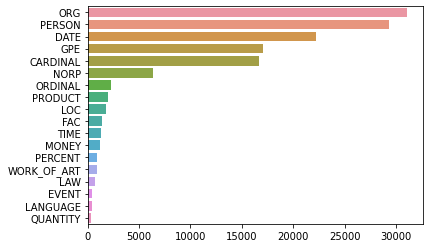

In [ ]:
import spacy
from collections import  Counter
import seaborn as sns
import pandas as pd
news= pd.read_csv('/content/Reviewed_File_all_english.csv', encoding = "cp437")
news.dropna(subset = ["Article"], inplace=True)#change thc column name 
def plot_named_entity_barchart(text):
    nlp = spacy.load("en_core_web_sm")
    
    def _get_ner(text):
        doc=nlp(text)
        return [X.label_ for X in doc.ents]
    
    ent=text.apply(lambda x : _get_ner(x))
    ent=[x for sub in ent for x in sub]
    counter=Counter(ent)
    count=counter.most_common()
    
    x,y=map(list,zip(*count))
    sns.barplot(x=y,y=x)


plot_named_entity_barchart(news['Article'])#change thc column name 


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


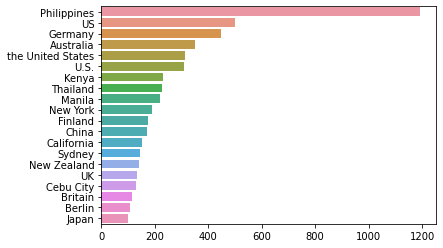

In [ ]:
nlp = spacy.load("en_core_web_sm")
def ner(text,ent="GPE"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]
gpe=news['Article'].apply(lambda x: ner(x))#change thc column name 
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)
x,y=map(list,zip(*counter.most_common(20)))
sns.barplot(y,x)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


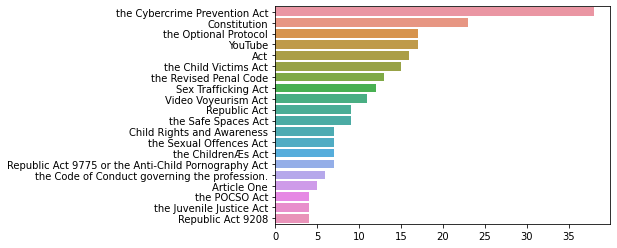

In [ ]:
def ner(text,ent="LAW"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]
gpe=news['Article'].apply(lambda x: ner(x))#change thc column name 
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)
x,y=map(list,zip(*counter.most_common(20)))
sns.barplot(y,x)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


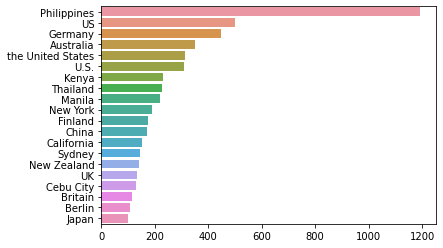

In [ ]:
def ner(text,ent="GPE"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]
gpe=news['Article'].apply(lambda x: ner(x))#change thc column name 
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)
x,y=map(list,zip(*counter.most_common(20)))
sns.barplot(y,x)

In [ ]:
words = basic_clean(''.join(str(df['Article'].tolist())))#change thc column name 

In [ ]:
(pd.Series(nltk.ngrams(words, 2)).value_counts())[90:120]

(facebook, twitter)         132
(child, young)              132
(sexual, harassment)        130
(case, child)               130
(de, oro)                   130
(justice, mission)          129
(international, justice)    128
(sex, offence)              127
(said, child)               126
(come, forward)             125
(six, month)                123
(sexually, explicit)        123
(dont, know)                122
(social, worker)            120
(four, year)                120
(make, sure)                120
(sexually, assaulted)       120
(manila, philippine)        120
(executive, director)       119
(young, boy)                119
(case, sexual)              119
(protection, child)         118
(victim, sexual)            118
(task, force)               118
(told, court)               116
(crime, child)              115
(social, networking)        115
(philippine, national)      114
(20, year)                  114
(also, found)               113
dtype: int64

In [ ]:
(pd.Series(nltk.ngrams(words, 3)).value_counts())[80:100]

(hotline, 02, 86517800)                          49
(007960018860, donate, paymaya)                  49
(foundation, support, healthcare)                49
(need, know, coronavirusnnnfor)                  49
(call, doh, hotline)                             49
(n, inquirer, foundation)                        49
(11491150nn, n, inquirer)                        49
(click, herennwhat, need)                        49
(deposited, banco, de)                           49
(cash, donation, deposited)                      49
(paymaya, using, link)                           49
(possession, child, pornography)                 48
(sexual, activity, child)                        48
(sex, abuse, case)                               47
(commission, institutional, response)            47
(two, year, ago)                                 47
(sexual, offence, child)                         47
(institutional, response, child)                 47
(cybercrime, prevention, act)                    46
(protected, 

In [ ]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[40:100]
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[40:100]

Text(0.5, 0, '# of Occurances')

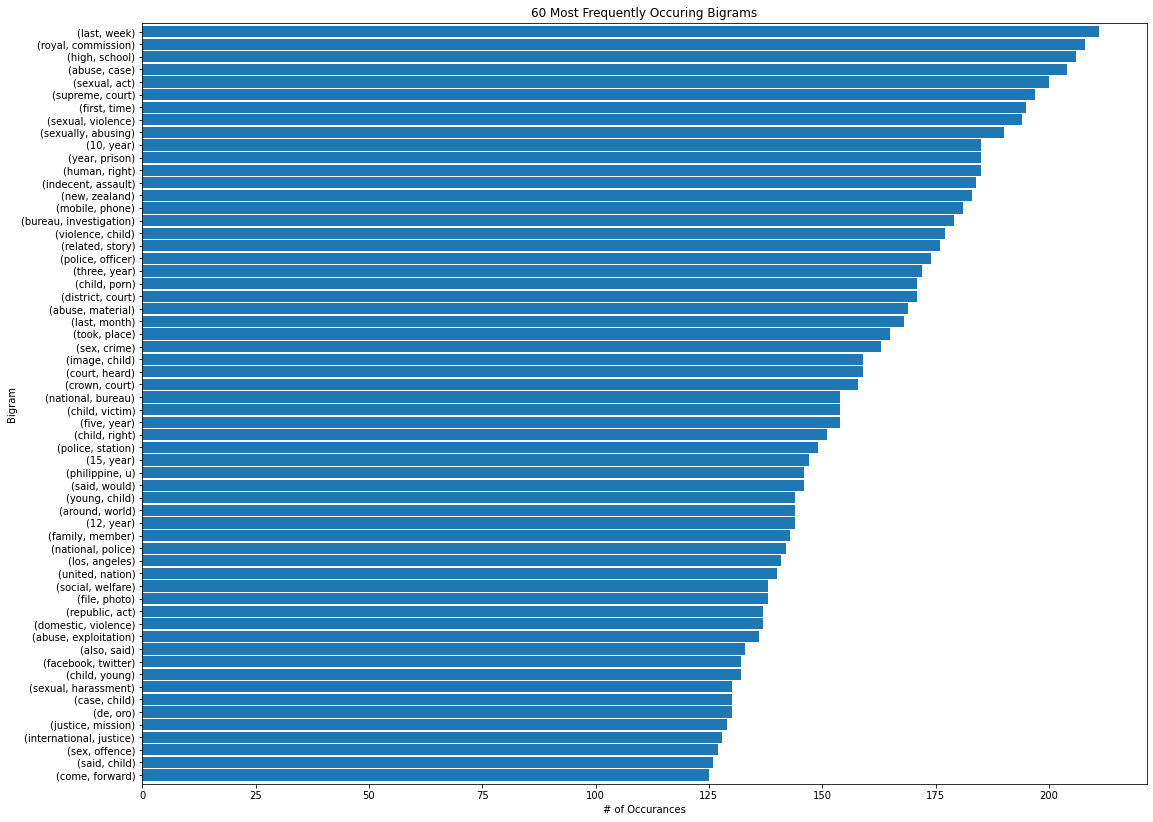

In [ ]:
bigrams_series.sort_values().plot.barh(width=.9, figsize=(18, 14))
plt.title('60 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')